# Linear Regression (선형회귀)

## 1. Univariate Linear Regression (단일 변수 선형 회귀)

### 1) 필요한 모듈을 지역 이름 공간에 불러오기

In [1]:
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

In [2]:
data = {
    'Temperature': [26, 27, 28, 29, 30, 31, 32, 33],
    'Number of Sells': [270, 280, 290, 300, 310, 320, 330, 340]
}
df = pd.DataFrame(data)

In [3]:
df

,Number of Sells,Temperature
0,270,26
1,280,27
2,290,28
3,300,29
4,310,30
5,320,31
6,330,32
7,340,33


In [4]:
df['Temperature'].values

array([26, 27, 28, 29, 30, 31, 32, 33])

In [5]:
df['Number of Sells'].values

array([270, 280, 290, 300, 310, 320, 330, 340])

### 2) 통계 수치에 대한 Scatter Plot 생성

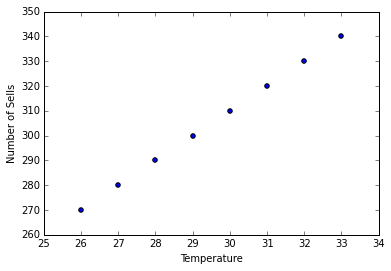

In [6]:
df.plot(kind="scatter", x="Temperature", y="Number of Sells")

### 3) scipy 모듈을 활용한 선형 회귀 분석

- stats 라는 모듈 아래 linregress라는 함수를 이용하여 각 값들을 가지고 선형 회귀 값들을 계산

In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Temperature'].values, df['Number of Sells'].values)

In [8]:
format = "%40s: %12.10f"
print format % ("slope", slope)
print format % ("intercept", intercept)   # slope과 intercept를 이용하여 h(x)의 값을 구한 것. (h(x) = 10.0 + 10.0x
print format % ("r_value (Correlation Coefficient)", r_value)
print format % ("r-squared (Coefficient of Determination)", r_value**2)
print format % ("p_value (Hyperthesis Testing)", p_value)
print format % ("std_err (Standard Error)", std_err)

                                   slope: 10.0000000000
                               intercept: 10.0000000000
       r_value (Correlation Coefficient): 1.0000000000
r-squared (Coefficient of Determination): 1.0000000000
           p_value (Hyperthesis Testing): 0.0000000000
                std_err (Standard Error): 0.0000000000


- r-squared: 추정된 회귀선이 표본 자료에 적합한가를 측정하는 결정 계수
    - '0'에 가까울 수록 관계가 없다
- p-value (유의 확률)
    - Null Hyperthesis (귀무 가설): 예측 변수(Predictor)와 결과 변수(Outcome Variable)사이에 아무런 관계가 없다.
    - Alternative Hypothesis (대립 가설): 예측 변수(Predictor)와 결과 변수(Outcome Variable)사이에 (선형)관계가 존재한다.
    - p-value는 Null Hyperthesis가 만족할 확률 (낮으면 낮을 수록 관계가 있으며 더 좋다)
- 통계학적으로, p-value < 0.05 이면 Null Hyperthesis가 만족할 확률은 거의 없다고 간주하고 Alternative Hyperthesis를 받아들인다.

- 상당히 작은 값이 나올 수록 가정이 맞으며 논문의 퀄리티가 올라간다.

### 4) 상관 계수 (correlation coefficient)

- r-value의 의미 (x와 y의 상관관계)
    - 1: 강한 양의 상관관계
    - 0: 아무 관계가 없음
    - -1: 강한 음의 상관 관계

[참고] Covariance 구하는 Python 코딩

In [9]:
def cov(a, b):

    if len(a) != len(b):
        return

    a_mean = np.mean(a)
    b_mean = np.mean(b)

    sum = 0

    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))

    return sum/(len(a) - 1)

- 위 코드에서 마지막 라인에 1을 빼는 이유
    > 자유도 (Degree of Feeedom): http://math7.tistory.com/113
    
    
- numpy를 활용한 r-value (상관 계수) 구하기

In [11]:
a = np.cov(df['Temperature'].values, df['Number of Sells'].values, ddof = 1)[0][1]
print a
b = np.std(df['Temperature'].values, ddof = 1)
print b
c = np.std(df['Number of Sells'].values, ddof = 1)
print c
print a / (b * c)

60.0
2.44948974278
24.4948974278
1.0


In [12]:
np.corrcoef(df['Temperature'].values, df['Number of Sells'].values, ddof = 1)[0][1]

1.0

## 2. Simple Linear Regression - II (실제 통계 데이터를 활용한 선형 회귀)

### 1) 데이터 설명

- URL
    - https://raw.githubusercontent.com/bluebibi/LINK_ML_BIG_DATA/master/death_rate.csv
- D: 사망률
- A1 ~ A15: 사망률에 영향이 있을 것 같은 각종 요인 데이터
- References


- Richard Gunst and Robert Mason, Regression Analysis and Its Applications: a data-oriented approach, Dekker, 1980, pages 370-371
- Gary McDonald and Richard Schwing, Instabilities of regression estimates relating air pollution to mortality, Technometrics, Volume 15, Number 3, pages 463-482, 1973.
- Helmut Spaeth, Mathematical Algorithms for Linear Regression, Academic Press, 1991, ISBN 0-12-656460-4.
- The death rate is to be represented as a function of other variables.

- There are 60 rows of data. The data includes:
    - I: the index;
    - A1: the average annual precipitation (강수량);
    - A2: the average January temperature;
    - A3: the average July temperature;
    - A4: the size of the population older than 65;
    - A5: the number of members per household;
    - A6: the number of years of schooling for persons over 22;
    - A7: the number of households with fully equipped kitchens;
    - A8: the population per square mile;
    - A9: the size of the nonwhite population;
    - A10: the number of office workers;
    - A11: the number of families with an income less than $3000;
    - A12: the hydrocarbon pollution index;
    - A13: the nitric oxide pollution index;
    - A14: the sulfur dioxide pollution index;
    - A15: the degree of atmospheric moisture.
    - D: the death rate.

### 2) Pandas를 활용한 데이터프레임 정의

In [13]:
import urllib2
import json

path = 'https://raw.githubusercontent.com/bluebibi/LINK_ML_BIG_DATA/master/death_rate.csv'
raw_csv = urllib2.urlopen(path)
df = pd.read_csv(raw_csv)

In [15]:
df

,I,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,D
0,1,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,0.921
1,2,35,23,72,11.1,3.14,11.0,78.8,4281,3.6,50.7,14.4,8,10,39,57,0.997
2,3,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,0.962
3,4,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,0.982
4,5,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1.071
5,6,53,45,80,7.7,3.45,10.2,66.8,3325,38.5,43.1,25.5,30,32,72,54,1.030
6,7,43,30,74,10.9,3.23,12.1,83.9,4679,3.5,49.2,11.3,21,32,62,56,0.934
7,8,45,30,73,9.3,3.29,10.6,86.0,2140,5.3,40.4,10.5,6,4,4,56,0.899
8,9,36,24,70,9.0,3.31,10.5,83.2,6582,8.1,42.5,12.6,18,12,37,61,1.001
9,10,36,27,72,9.5,3.36,10.7,79.3,4213,6.7,41.0,13.2,12,7,20,59,0.912


### 3) 회귀 분석을 위한 몇가지 요인 선택
- A1 (연강수량)
- A2 (1월 온도)
- A3 (7월 온도)

In [16]:
df_sub = df[['A1','A2','A3', 'D']]

In [18]:
df_sub.head()    # 전체에서 상위 5개만 출력

,A1,A2,A3,D
0,36,27,71,0.921
1,35,23,72,0.997
2,44,29,74,0.962
3,47,45,79,0.982
4,43,35,77,1.071


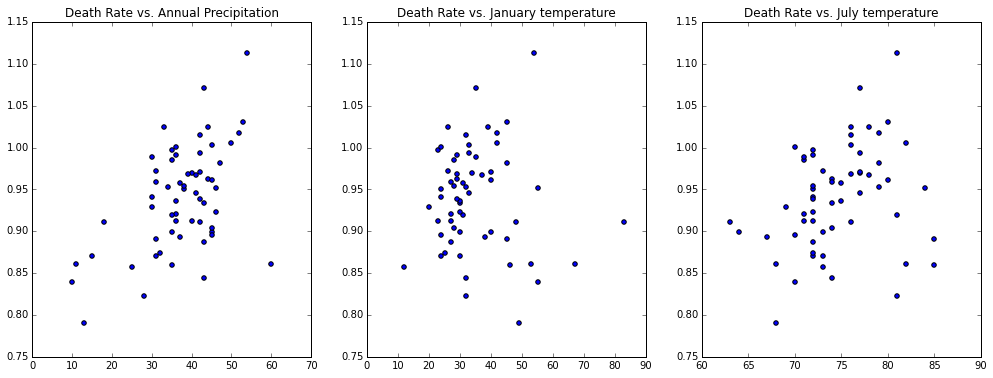

In [20]:
fig = plt.figure(figsize=(17, 6))
ax1 = fig.add_subplot(131)
ax1.scatter(df_sub['A1'], df_sub['D'])
ax1.set_title("Death Rate vs. Annual Precipitation")

ax2 = fig.add_subplot(132)
ax2.scatter(df_sub['A2'], df_sub['D'])
ax2.set_title("Death Rate vs. January temperature")

ax3 = fig.add_subplot(133)
ax3.scatter(df_sub['A3'], df_sub['D'])
ax3.set_title("Death Rate vs. July temperature")

### 4) scipy 모듈을 활용한 선형 회귀 분석

- 강수량과 사망률이 얼마나 관계가 있는가를 linregress 값들을 구하여 비교

In [21]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sub['A1'].values, df_sub['D'].values)

In [22]:
format = "%40s: %12.10f"
print format % ("slope", slope)
print format % ("intercept", intercept)
print format % ("r_value (Correlation Coefficient)", r_value)
print format % ("r-squared (Coefficient of Determination)", r_value**2)
print format % ("p_value (Hyperthesis Testing)", p_value)
print format % ("std_err (Standard Error)", std_err)

                                   slope: 0.0031827857
                               intercept: 0.8209365741
       r_value (Correlation Coefficient): 0.5105898154
r-squared (Coefficient of Determination): 0.2607019596
           p_value (Hyperthesis Testing): 0.0000307229
                std_err (Standard Error): 0.0007037705


- 모든 Predicator 변수들에 대한 분석

In [23]:
predicator_analysis = {}
for i in range(1, 16):
    predicator_analysis[i] = Series(np.empty(6), index=['slope', 'intercept', 'r_value', 'r_squared', 'p_value', 'std_err'])
    predicator_analysis[i][0],\
    predicator_analysis[i][1],\
    predicator_analysis[i][2],\
    predicator_analysis[i][4],\
    predicator_analysis[i][5] = stats.linregress(df['A' + str(i)].values, df['D'].values)
    predicator_analysis[i][3] = predicator_analysis[i][2] ** 2


format1 = "%3s %15s %15s %15s %15s %15s %15s"
format2 = "%3d %15f %15f %15f %15f %15f %15f"
print format1 % ('No.', 'slope', 'intercept', 'r_value', 'r_squared', 'p_value', 'std_err')
for i in range(1, 16):
    lst = [i]
    for j in range(6):
        lst.append(predicator_analysis[i][j])
    print format2 % tuple(lst)
    
df2 = pd.DataFrame(predicator_analysis)
print df2

No.           slope       intercept         r_value       r_squared         p_value         std_err
  1        0.003183        0.820937        0.510590        0.260702        0.000031        0.000704
  2       -0.000303        0.950407       -0.058248        0.003393        0.658436        0.000681
  3        0.003644        0.668059        0.279026        0.077856        0.030855        0.001647
  4       -0.007426        1.005207       -0.174749        0.030537        0.181736        0.005494
  5        0.165038        0.401320        0.358641        0.128623        0.004895        0.056404
  6       -0.037738        1.353973       -0.512525        0.262681        0.000028        0.008302
  7       -0.005178        1.358817       -0.427713        0.182938        0.000653        0.001437
  8        0.000011        0.896037        0.264186        0.069794        0.041378        0.000005
  9        0.004495        0.886501        0.644138        0.414914        0.000000        0.000701


### 5) 선형 회귀식과 Scatter Plot을 함께 생성

In [36]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sub['A1'].values, df_sub['D'].values)
a1 = [slope, intercept]
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sub['A2'].values, df_sub['D'].values)
a2 = [slope, intercept]
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sub['A3'].values, df_sub['D'].values)
a3 = [slope, intercept]

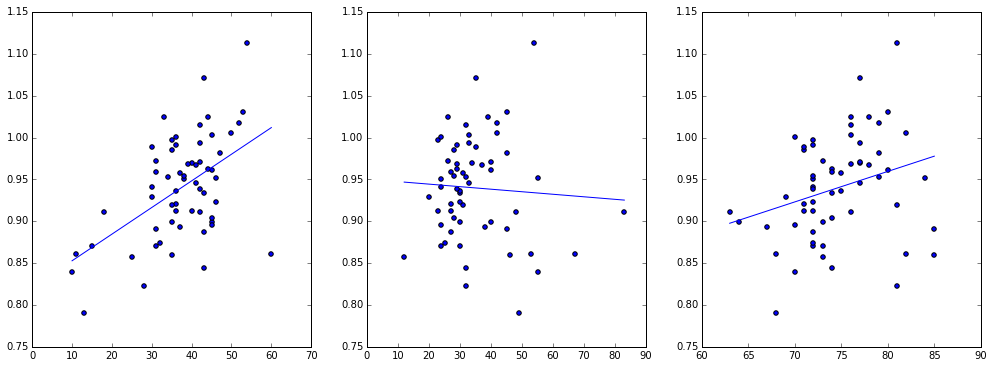

In [40]:
fig = plt.figure(figsize=(17, 6))
ax1 = fig.add_subplot(131)
ax1.scatter(df_sub['A1'], df_sub['D'])
line_plot_x1 = np.linspace(df_sub['A1'].min(), df_sub['A1'].max(), 10)   #linspace 최대와 최소 사이의 값 10개를 뽑아냄
ax1.plot(line_plot_x1, a1[1] + a1[0] * line_plot_x1)                     #뽑아낸 5개의 값을 가지고 선을 그림. (h()를 그려내는 것)

ax2 = fig.add_subplot(132)
ax2.scatter(df_sub['A2'], df_sub['D'])
line_plot_x2 = np.linspace(df_sub['A2'].min(), df_sub['A2'].max(), 10)
ax2.plot(line_plot_x2, a2[1] + a2[0] * line_plot_x2)

ax3 = fig.add_subplot(133)
ax3.scatter(df_sub['A3'], df_sub['D'])
line_plot_x3 = np.linspace(df_sub['A3'].min(), df_sub['A3'].max(), 10)
ax3.plot(line_plot_x3, a3[1] + a3[0] * line_plot_x3)

## 3. Multivariate Linear Regression (다변수 선형 회귀)

### - sklearn 모듈을 활용한 다중 변수 선형 회귀